### Data Preprocessing 

##### https://github.com/PacktPublishing/Hands-On-Data-Preprocessing-in-Python   https://www.analyticsvidhya.com/blog/2021/06/data-cleaning-using-pandas/#


In [66]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


import warnings
warnings.filterwarnings('ignore')

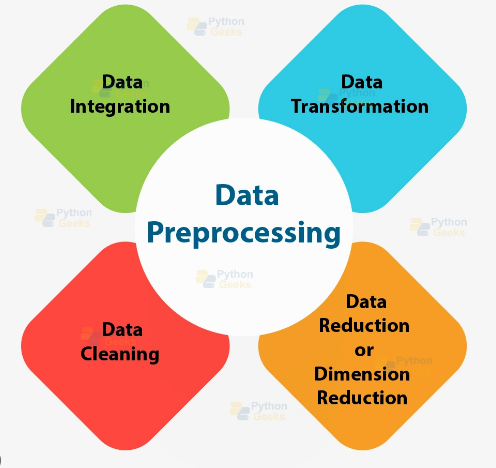

### Data Cleaning
- Handling Missing Values: Impute missing data using strategies like mean, median, mode, or remove rows/columns with missing values.
- Removing Duplicates: Identify and remove duplicate entries.
- Handling Outliers: Detect and handle outliers using methods like z-score, IQR, or capping.
- Fixing Incorrect Data: Correct data inconsistencies (e.g., standardizing categorical labels).

In [123]:
data = {
        'Name': ['Alice', 'Bob', 'Alice', 'David', 'Bob',"bol"],
        'Age': [25, 30, 25, 40, 30,pd.NA]
}

In [125]:
df = pd.DataFrame(data)

##### Handling Missing Values :-

In [53]:
df.isna()

,Name,Age
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,True


In [54]:
df.isna().sum()

Name    0
Age     1
dtype: int64

In [78]:
df.isna().sum() / df.shape[0]  * 100

Name     0.000000
Age     16.666667
dtype: float64

In [55]:
df.dropna() 

,Name,Age
0,Alice,25
1,Bob,30
2,Alice,25
3,David,40
4,Bob,30


In [56]:
df.dropna() # inplace=True

,Name,Age
0,Alice,25
1,Bob,30
2,Alice,25
3,David,40
4,Bob,30


In [61]:
df.dropna(how='any')  # all or any

,Name,Age
0,Alice,25
1,Bob,30
2,Alice,25
3,David,40
4,Bob,30


In [62]:
df.dropna(axis=1) # drop columns with missing values

,Name
0,Alice
1,Bob
2,Alice
3,David
4,Bob
5,bol


In [63]:
df.dropna(axis=0) # dropp rows with missing values

,Name,Age
0,Alice,25
1,Bob,30
2,Alice,25
3,David,40
4,Bob,30


In [64]:
df.dropna(subset=["Age"])
df.dropna(subset=['Name', 'Age'])

,Name,Age
0,Alice,25
1,Bob,30
2,Alice,25
3,David,40
4,Bob,30


In [68]:
df.dropna(thresh= 1) 

,Name,Age
0,Alice,25
1,Bob,30
2,Alice,25
3,David,40
4,Bob,30
5,bol,<NA>


In [128]:
df.dropna(thresh= 2)  # the number for missing valuwes in row to be droped

,Name,Age
0,Alice,25
1,Bob,30
2,Alice,25
3,David,40
4,Bob,30


In [71]:
df["Age"].fillna(df["Age"].mean())
df["Age"].fillna(df["Age"].median())
df["Age"].fillna(df["Age"].mode()[0])
df["Age"].fillna(df["Age"].max())
df["Age"].fillna(df["Age"].min())
df.fillna(df.mode().iloc[0])

In [ ]:
df.fillna(method='ffill')
df.fillna(method='bfill')

In [ ]:
# random choice for missing values in Gender column
df['Gender'] = df['Gender'].apply(lambda x: np.random.choice(['Male', 'Female']) if pd.isnull(x) else x)


user_table= df['User'].dropna()
df['User'] = df['Gender'].apply(lambda x: np.random.choice(user_table=df["User"] ) if pd.isnull(x) else x)

In [ ]:
df['Age'].interpolate(method='polynomial')
df['Age'].interpolate(method='polynomial', order=2)

In [ ]:
from sklearn.impute import SimpleImputer


imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [ ]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3)
df_knn_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [ ]:
from fancyimpute import IterativeImputer  # You may need to install fancyimpute


imputer = IterativeImputer()
df_mice_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

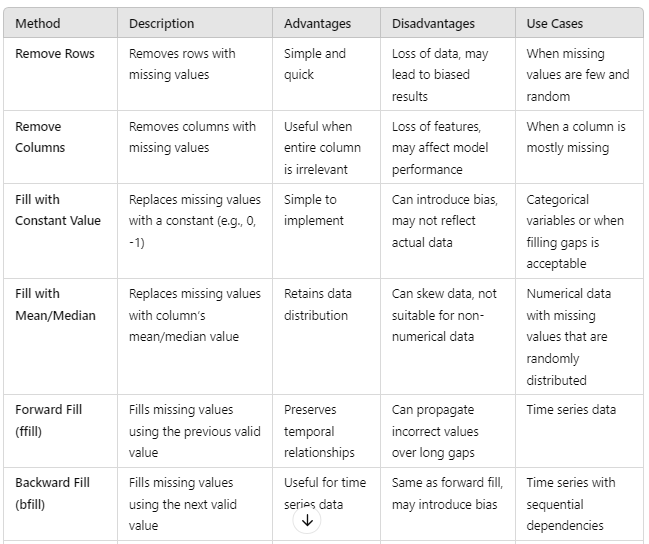
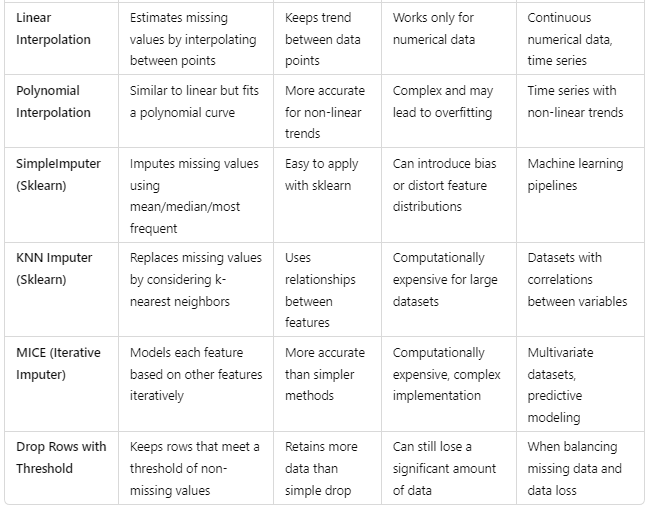

##### Removing Duplicates :-

In [27]:
df.head()

,Name,Age
0,Alice,25
1,Bob,30
2,Alice,25
3,David,40
4,Bob,30


In [28]:
df.duplicated()

0    False
1    False
2     True
3    False
4     True
dtype: bool

In [29]:
df.duplicated().sum()

2

In [30]:
df.drop_duplicates() # inplace=True

,Name,Age
0,Alice,25
1,Bob,30
3,David,40


In [31]:
df.duplicated().sum()

2

In [127]:
df.drop_duplicates(keep='last')

,Name,Age
2,Alice,25
3,David,40
4,Bob,30
5,bol,<NA>


In [34]:
df.drop_duplicates(keep=False)

,Name,Age
3,David,40


In [126]:
df.drop_duplicates(subset=['Name'])

,Name,Age
0,Alice,25
1,Bob,30
3,David,40
5,bol,<NA>


In [ ]:
# Sort by 'Date' and then remove duplicates, keeping the latest record
df.sort_values('Date').drop_duplicates(subset=['Name'], keep='last')

In [ ]:
# Forward fill and backward fill missing values within duplicates
df.groupby('Name').apply(lambda x: x.ffill().bfill()).drop_duplicates()

In [41]:
from fuzzywuzzy import fuzz

# Custom function for finding the fuzzy duplicates
def find_fuzzy_duplicates(dataframe, column, threshold):
    duplicates = []
    # Iterate over each row in the DataFrame
    for i in range(len(dataframe)):
        # Compare the current row with subsequent rows
        for j in range(i+1, len(dataframe)):
            # Calculate the similarity score using fuzz.ratio
            similarity = fuzz.ratio(dataframe[column][i], dataframe[column][j])
            # Check if the similarity score meets the threshold
            if similarity >= threshold:
                # Add the duplicate rows to the duplicates list
                duplicates.append(dataframe.iloc[[i, j]])
    # Concatenate the list of DataFrames into a single DataFrame
    if duplicates:
      duplicates_df = pd.concat(duplicates)
      return duplicates_df
    else:
      return pd.DataFrame()

C:\Users\Mohamed Yasser\AppData\Roaming\Python\Python312\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [44]:
# Define the threshold value
threshold = 70

# Find fuzzy duplicates in the 'StudentName' column
fuzzy_duplicates = find_fuzzy_duplicates(df, 'Name', threshold)
fuzzy_duplicates

,Name,Age
0,Alice,25
2,Alice,25
1,Bob,30
4,Bob,30


In [45]:
df[df.duplicated()]

,Name,Age
2,Alice,25
4,Bob,30


#### Handling Outliers:-
- Z-Score: Best for data that follows a normal distribution.
- IQR: More robust and suitable for skewed data.
- Isolation Forest: Good for large, high-dimensional datasets.
- Boxplot: Visual method to quickly spot outliers.

###### https://medium.com/@marc.bolle/5-easy-ways-to-detect-outliers-in-python-b07639ba32d5             https://www.analyticsvidhya.com/blog/2021/05/feature-engineering-how-to-detect-and-remove-outliers-with-python-code/   https://careerfoundry.com/en/blog/data-analytics/how-to-find-outliers/

In [80]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

from sklearn.ensemble import IsolationForest
from scipy import stats

c:\Program Files\Python312\Lib\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


### When to Use the Z-Score Method:

- Normal Distribution: Use the Z-score when your data follows a normal distribution, or at least approximately normal. This is because the Z-score relies on the mean and standard deviation, which are only meaningful when the data is normally distributed.

- Symmetrical Data: If your data is symmetric around the mean, the Z-score method is appropriate.

- When You Have No Extreme Skewness: The Z-score method is less effective if the data is heavily skewed. In such cases, the Z-score might incorrectly identify outliers or miss actual ones.

- Small to Moderate Size Datasets: Z-scores can be effective for small to moderate-sized datasets where the normality assumption holds

#### Z_score

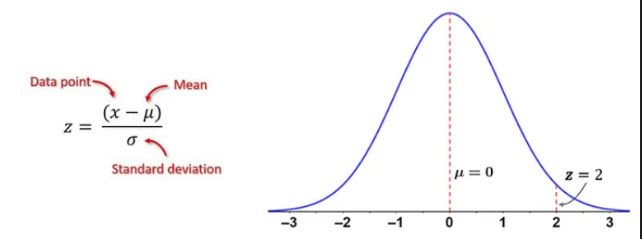

In [93]:
data = np.array([10, 12, 13, 15, 15, 16, 14, 120, 14, 15, 13])

# Calculate Z-scores
z_scores = np.abs((data - np.mean(data)) / np.std(data))

# Identify outliers
outliers = data[z_scores > 1]
data2 = data[z_scores <= 1]
print("Outliers:", outliers)
print("Z_score", z_scores)

Outliers: [120]
Z_score [0.43670773 0.37135011 0.3386713  0.27331368 0.27331368 0.24063487
 0.30599249 3.15796135 0.30599249 0.27331368 0.3386713 ]


<Axes: ylabel='Density'>

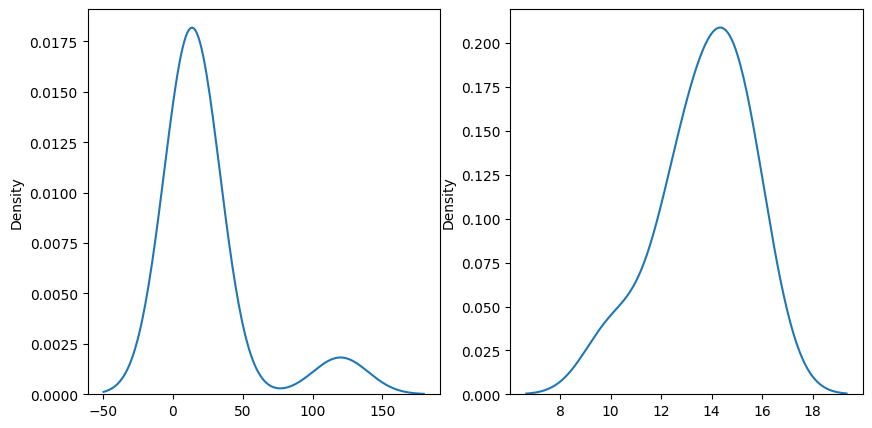

In [94]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.kdeplot(data)
plt.subplot(1, 2, 2)
sns.kdeplot(data2)

#### Interquartile Range (IQR) :-
- Non-Normal Distribution.

- Use the IQR method when your data does not follow a normal distribution. It’s effective for data that is skewed or has a non-normal distribution because it relies on the median and quartiles, which are less affected by skewness and extreme values.

- The IQR method is particularly useful when your data is skewed or has long tails. It doesn’t assume any specific distribution of data, making it versatile.
When Dealing with Small Sample Sizes:

- The IQR method works well even with small datasets, where statistical assumptions (like normality) might not hold.
When You Want to Minimize the Influence of Outliers:

- If you’re looking to detect and possibly remove outliers without being overly influenced by them (as mean and standard deviation can be), the IQR method is a better choice.

- The IQR method is robust against extreme values or outliers themselves. Since it uses the median and quartiles, it’s not sensitive to the magnitude of the outliers.

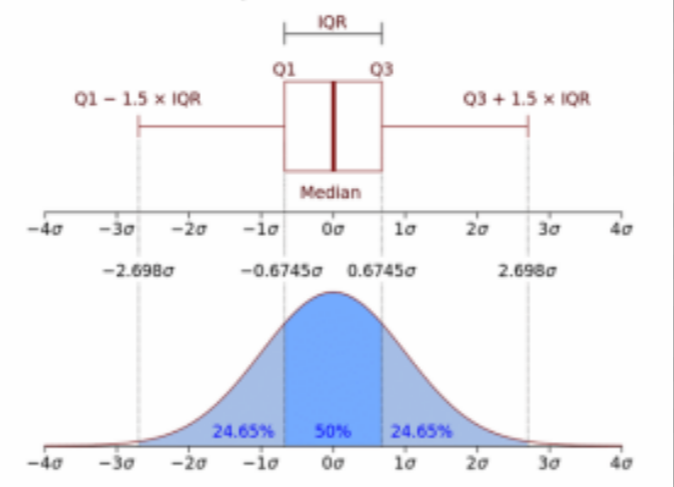

In [101]:
data = np.array([10, 12, 13, 15, 15, 16, 14, 50,120, 14, 15, 13])

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)
IQR = Q3 - Q1

# Define outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = data[(data < lower_bound) | (data > upper_bound)]

print("Outliers (IQR Method):", outliers)

Outliers (IQR Method): [ 50 120]


<Axes: ylabel='Density'>

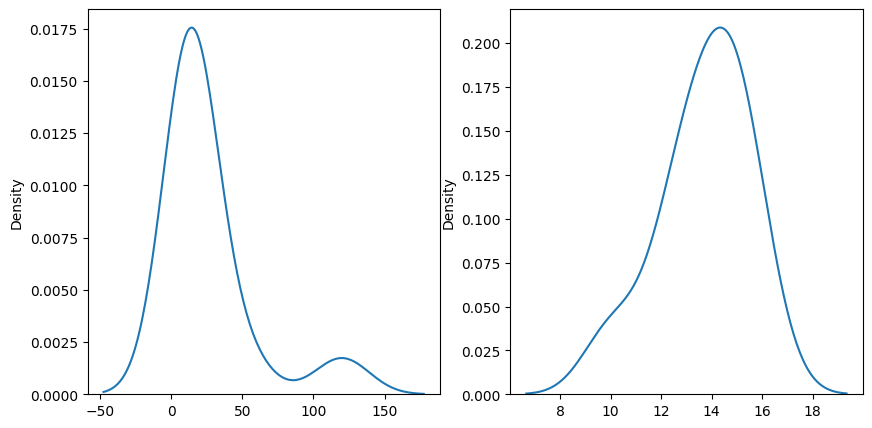

In [102]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.kdeplot(data)
plt.subplot(1,2,2)
sns.kdeplot(data2)

#### Isolated Forest
- Large Datasets:

- Isolation Forest is well-suited for large datasets. It scales well to high-dimensional data and large sample sizes, making it efficient and effective when dealing with complex datasets.
High-Dimensional Data:

- This method excels in detecting outliers in high-dimensional spaces where traditional methods like Z-score or IQR might struggle due to the curse of dimensionality.
Unlabeled Data:

- If you don’t have labeled data (i.e., you don’t know in advance which points are outliers), Isolation Forest is a great choice because it’s an unsupervised learning algorithm.
When Outliers Are Rare and Hard to Define:

- Isolation Forest is particularly useful when the definition of an outlier is not clear-cut or when outliers are rare. The algorithm is designed to isolate outliers quickly by randomly selecting features and splitting data points.
Complex Distributions:

- When dealing with data that doesn’t follow a simple distribution pattern (e.g., multimodal distributions or data with complex interrelationships between features), Isolation Forest can effectively identify anomalies.
Real-Time Anomaly Detection:

- Isolation Forest can be used for real-time anomaly detection in streams of data, such as detecting fraud, network intrusions, or other types of unusual activities.

In [111]:
# Example data
data = np.array([10, 12, 13, 15,30,15, 16, 20,50, 14, 120, 14, 15, 13]).reshape(-1, 1)

# Fit the model
iso = IsolationForest(contamination=0.1)
y_pred = iso.fit_predict(data)

# Outliers are indicated by -1
outliers = data[y_pred == -1]
data2 =  data[y_pred != -1]
print("Outliers (Isolation Forest Method):", outliers.flatten())

Outliers (Isolation Forest Method): [ 50 120]


<Axes: ylabel='Density'>

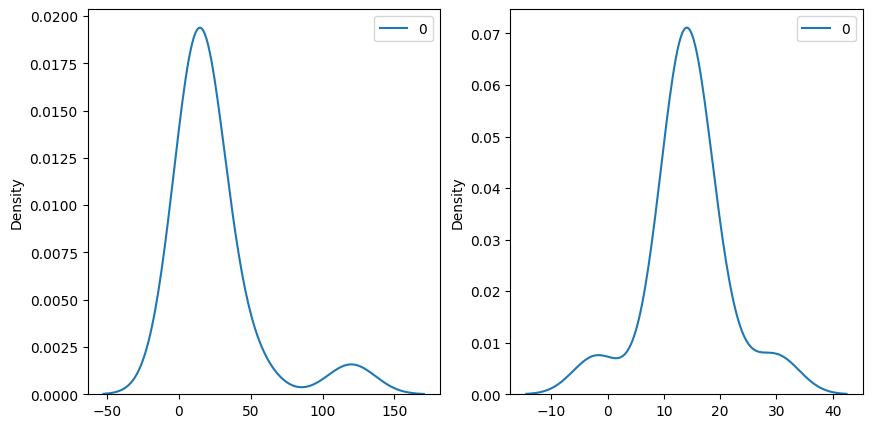

In [108]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.kdeplot(data)
plt.subplot(1,2,2)
sns.kdeplot(data2)

#### How to handle Outliers values

#### Trimming (Removing Outliers)
What It Is: Trimming involves removing outlier values from your dataset. This is useful when you have a small number of extreme outliers that are likely errors or irrelevant to your analysis.

- When to Use:
    - When the outliers are clearly data entry errors.
    - When outliers represent noise that does not provide valuable information.
    - When the dataset is large enough that removing outliers doesn’t significantly affect the analysis.
- Advantages:
    - Simple and quick to implement.
    - Can improve the accuracy of certain statistical analyses by removing noise.
- Disadvantages:
    - Reduces the size of the dataset.
    - Risk of losing valuable information if not done carefully.


In [ ]:
trimmed_data = data[(data >= lower_bound) & (data <= upper_bound)]

#### Capping (Winsorizing)
What It Is: Capping involves setting limits (caps) on extreme values. Outliers are then set to a specified percentile, effectively "flattening" them.
- When to Use:
    - When outliers are extreme but legitimate observations, and you want to reduce their impact without removing them.
    - When the dataset is small, and removing outliers would lead to loss of significant data.
- Advantages:
    - Retains all data points.
    - Reduces the impact of extreme values on your analysis.
- Disadvantages:
    - Can lead to misleading results if the capping limits are not chosen carefully.

In [112]:
capped_data = np.clip(data, lower_bound, upper_bound)
print("Orign Data:", data.flatten().astype(int))
print("Capped Data:", capped_data.flatten().astype(int))

Orign Data: [ 10  12  13  15  30  15  16  20  50  14 120  14  15  13]
Capped Data: [10 12 13 15 18 15 16 18 18 14 18 14 15 13]


#### Treating Outliers as Missing Values
What It Is: Treating outliers as missing values involves replacing them with NaN and then imputing the missing values using techniques like mean/median imputation or more sophisticated methods.

- When to Use:
    - When outliers are rare and do not represent significant portions of the data.
    - When imputing values based on the rest of the dataset makes more sense than retaining or removing the outliers.
- Advantages:
    - Allows the inclusion of all data points without skewing the results.
- Disadvantages:
    - Imputation can introduce bias if not done carefully.

In [ ]:
data[data > upper_bound] = np.nan
data[data < lower_bound] = np.nan

# replace with  median
imputed_data = np.nan_to_num(data, nan=np.nanmedian(data))

print("Original data: ",data)
print("Data with Imputed Values:", imputed_data)

#### Discretization (Binning)
What It Is: Discretization involves dividing continuous data into bins or intervals and then categorizing the data points, including outliers, into these bins.

-  When to Use:
    - When you want to reduce the effect of extreme values by grouping them into broader categories.
    - When analyzing ordinal or categorical data where precise values of outliers are less critical.
-  Advantages:
    - Simplifies the analysis by reducing the number of unique values.
    - Can help in identifying patterns or trends in data.
-  Disadvantages:
    - Loss of detailed information.
    - The choice of bins can heavily influence the results.

In [ ]:
bins = [0, 15, 30, 120]
labels = ["Low", "Medium", "High"]
binned_data = np.digitize(data, bins, right=True)

print("Binned Data:", binned_data)

In [ ]:
# When to Drop Outliers------------------------------

# Data Entry Errors:
# If the outliers are a result of data entry errors, measurement errors, or other inaccuracies, they should be removed since they do not reflect the true nature of the data.
# Example: A height recorded as 250 cm in a dataset of adult human heights.

# Irrelevant to Analysis:
# If the outliers do not represent the population or phenomenon you are studying, they might be irrelevant and can be removed.
# Example: In a study of household income in a particular city, including a billionaire's income might skew results and not reflect the typical economic situation.

# When They Distort Statistical Analysis:
# If outliers heavily influence the results of statistical models (e.g., mean, linear regression) and lead to misleading conclusions, dropping them can be justified.
# Example: In a linear regression model, a few extreme outliers could disproportionately affect the slope and intercept.

# When Sample Size Is Large:
# In large datasets, removing a small number of outliers usually won’t significantly impact the overall analysis, making it safer to drop them.
# Example: In a survey with thousands of responses, removing a few extreme outliers might not change the overall findings.

####################################################################################################################################

# When to Keep Outliers----------------

# Genuine Observations:
# If the outliers are legitimate data points that represent real and significant observations, they should be retained.
# Example: In a dataset of student exam scores, a few very high or very low scores might represent exceptional or struggling students and should not be removed.

# When Outliers Are of Interest:
# If your analysis aims to study or understand outliers specifically, you should keep them.
# Example: In fraud detection, outliers might represent fraudulent transactions, which are the focus of the analysis.

# Small Datasets:
# In small datasets, removing outliers could lead to loss of significant information and reduce the representativeness of the dataset.
# Example: In medical research with a small number of participants, every data point could be crucial, and removing outliers might lead to biased conclusions.

# When Outliers Reflect Variability in the Population:
# If outliers are part of the natural variability in the population, they should be kept to maintain the integrity of the analysis.
# Example: In environmental studies, extreme weather conditions might be outliers but are part of the natural variability and should be included.

# If They Don’t Significantly Affect the Analysis:
# If the outliers don’t distort the analysis results significantly, there might be no strong reason to remove them.
# Example: In a robust regression model that is less sensitive to outliers, it might not be necessary to remove them.
# Strategies for Handling Outliers

# Assess the Impact:
# Before deciding, evaluate how much the outliers impact your analysis. You can run the analysis with and without the outliers to compare the results.

# Transform the Data:
# Instead of removing outliers, consider applying transformations (e.g., logarithmic) that reduce the impact of outliers while keeping them in the dataset.

# Use Robust Methods:
# Employ statistical methods that are less sensitive to outliers, such as robust regression or median-based measures, which allow you to retain outliers without them skewing the results.


### Standardizing Categorical Labels

In [114]:
data = {'City': ['New York', 'new york', 'NEW YORK', 'Los Angeles', 'los angeles', 'LOS ANGELES', 'San Francisco', 'san francisco']}

In [115]:
df = pd.DataFrame(data)

In [116]:
correction_map = {
    'New Yrok': 'New York',
    'Los Angelas': 'Los Angeles',
    'San Frnacisco': 'San Francisco'
}

# Replacing misspelled labels with correct ones
df['City'] = df['City'].replace(correction_map)

In [119]:
df['City'] = df['City'].astype('category')
df['City']

0         New York
1         new york
2         NEW YORK
3      Los Angeles
4      los angeles
5      LOS ANGELES
6    San Francisco
7    san francisco
Name: City, dtype: category
Categories (8, object): ['LOS ANGELES', 'Los Angeles', 'NEW YORK', 'New York', 'San Francisco', 'los angeles', 'new york', 'san francisco']

###  Data Transformation

##### Normalization/Scaling: :-

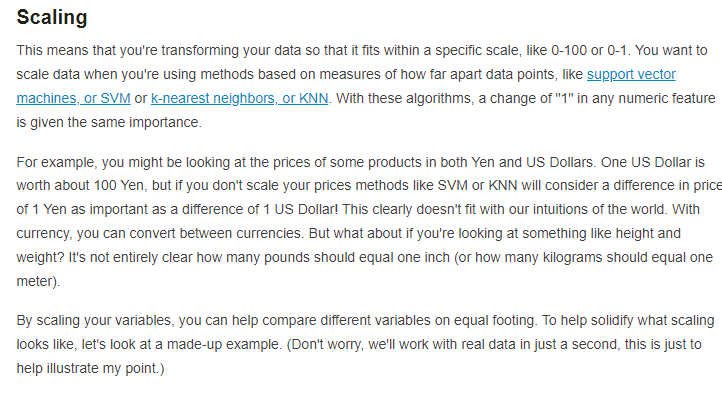  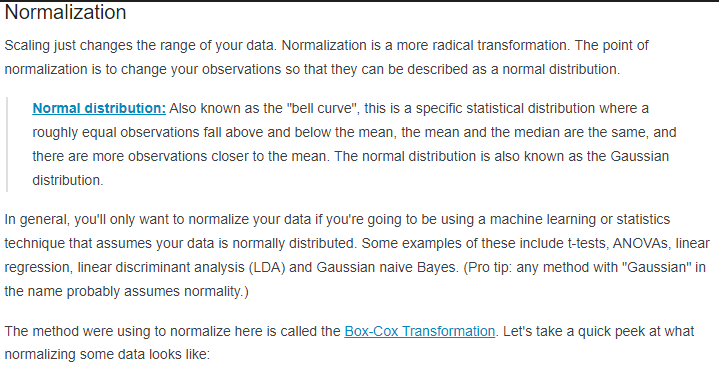

In [159]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler , MaxAbsScaler ,StandardScaler , Normalizer

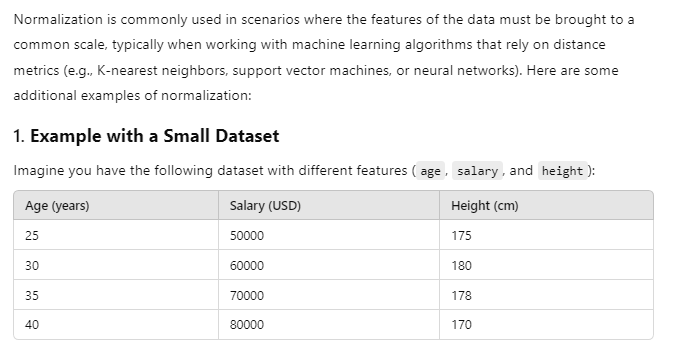

##### Min-Max Normalization (Normalization) :-

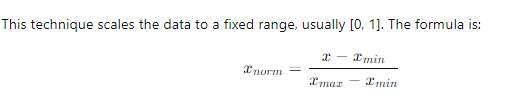

In [170]:
df.dropna(inplace=True)
data = df.drop(columns=["Name"],axis=1)

In [167]:
scaler = MinMaxScaler()

In [168]:
normal = scaler.fit_transform(data)
print(normal.flatten().tolist())

[0.0, 0.33333333333333326, 0.0, 0.9999999999999998, 0.33333333333333326]


<Axes: ylabel='Density'>

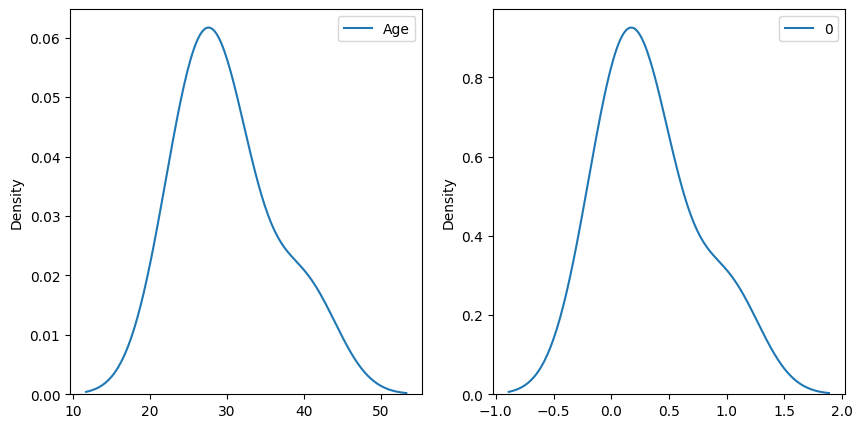

In [169]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.kdeplot(data)
plt.subplot(1, 2, 2)
sns.kdeplot(normal)

#### Mean (Normalization) :-

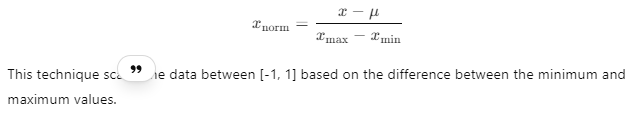

In [164]:
scaler = Normalizer()

In [165]:
normal = scaler.fit_transform(data)
print(normal)

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]]


#### Z-Score Normalization (Standardization):-

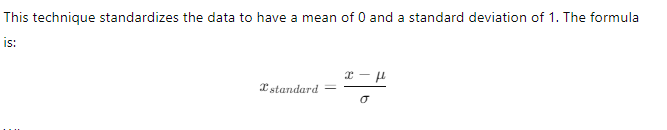

In [171]:
df.dropna(inplace=True)
data = df.drop(columns=["Name"],axis=1)

In [172]:
scaler = StandardScaler()

In [173]:
normal = scaler.fit_transform(data)
print(normal.flatten().tolist())

[-0.9128709291752769, 0.0, -0.9128709291752769, 1.8257418583505538, 0.0]


<Axes: ylabel='Density'>

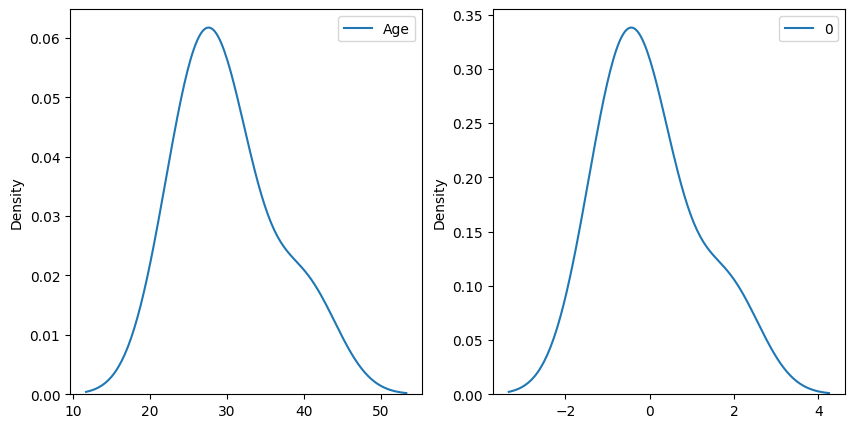

In [174]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.kdeplot(data)
plt.subplot(1, 2, 2)
sns.kdeplot(normal)

##### Max Absolute (Standardization)  :-

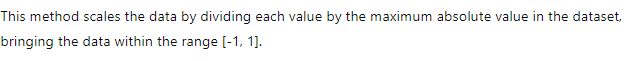

In [153]:
scaler = MaxAbsScaler()

In [154]:
normal = scaler.fit_transform(data)
print(normal.flatten().tolist())

[0.625, 0.75, 0.625, 1.0, 0.75]


####  Robust Scaler (Standardization) :-

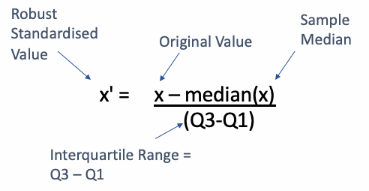

In [156]:
scaler = RobustScaler()

In [157]:
normal = scaler.fit_transform(data)
print(normal.flatten().tolist())

[-1.0, 0.0, -1.0, 2.0, 0.0]


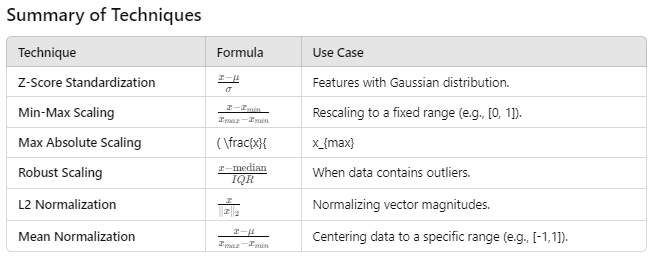

### Binding

In [ ]:
interval = [18 , 35 , 75 , 100 , 120]
label = ["flex" , 'coin' , "2x" , '2mage']
data['offer2'] = pd.cut(data['MonthlyCharges'] , bins = interval , labels= label)

In [ ]:
min,max = data['TotalCharges'].agg(['min' , 'max'])
interval = pd.interval_range(start= min  , freq = 1000 , end = max)
data['offer3'] = pd.cut(data['TotalCharges'] , bins = interval , labels= [])

### Encoding categorical data

##### Label Encoding :-

In [9]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder , OrdinalEncoder

In [191]:
data = ['Red', 'Green', 'Blue', 'Green']

In [178]:
label_encoder = LabelEncoder()
encoded_data = label_encoder.fit_transform(data)

print("Label Encoded Data:", encoded_data)

Label Encoded Data: [2 1 0 1]


### One Hot Encoding :-

In [185]:
data = [['Red'], ['Green'], ['Blue'], ['Green']]
one_hot_encoder = OneHotEncoder(sparse_output=False)
encoded_data = one_hot_encoder.fit_transform(data)

print("One-Hot Encoded Data:")
print(encoded_data)

One-Hot Encoded Data:
[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]


#### Binary Encoding:-

In [188]:
import category_encoders as ce

data = ['A', 'B', 'C', 'B']
encoder = ce.BinaryEncoder()
encoded_data = encoder.fit_transform(data)

print("Binary Encoded Data:")
print(encoded_data)

Binary Encoded Data:
   0_0  0_1
0    0    1
1    1    0
2    1    1
3    1    0


#### OrdinalEncoder :-

In [190]:
data = [['Small'], ['Medium'], ['Large'], ['Medium']]
ordinal_encoder = OrdinalEncoder()
encoded_data = ordinal_encoder.fit_transform(data)

print("Ordinal Encoded Data:", encoded_data)

Ordinal Encoded Data: [[2.]
 [1.]
 [0.]
 [1.]]


In [ ]:
df.map({"Name": 1, "mam": 2, "asa": 3, "das": 4, "asda": 5})

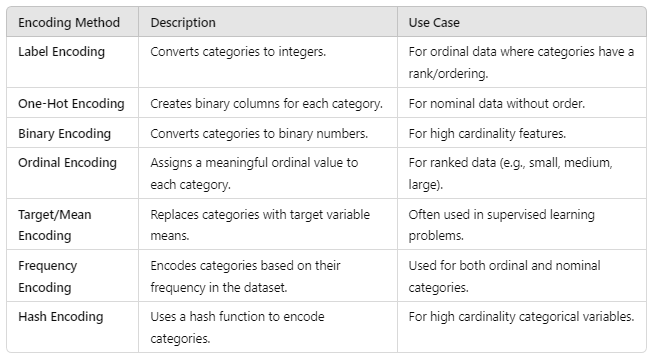

--------------------------------------------------------------------------------------------------------------

### Feature Selection 

In [6]:
data = {
    'Age': [25, 34, 45, 22, 52, 33, 27, 48],
    'Salary': [50000, 72000, 80000, 35000, 90000, 60000, 42000, 85000],
    'Gender': ['Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female'],
    'Credit Score': [600, 720, 650, 500, 700, 680, 550, 720],
    'Purchased House': ['No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes'],
    'Purchased Car': ['Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes'],
    'Target': [0, 1, 1, 0, 1, 0, 0, 1]
}

In [177]:
df = pd.DataFrame(data)

#### Removing Irrelevant Features (Filter Methods) :-

In [178]:
df.sample()

,Age,Salary,Gender,Credit Score,Purchased House,Purchased Car,Target
7,48,85000,Female,720,Yes,Yes,1


In [166]:
encoder = LabelEncoder()

df['Gender'] = encoder.fit_transform(df['Gender'])
df['Purchased House'] = encoder.fit_transform(df['Purchased House'])
df['Purchased Car'] = encoder.fit_transform(df['Purchased Car'])

In [183]:
df.shape

(8, 7)

In [179]:
df.head()

,Age,Salary,Gender,Credit Score,Purchased House,Purchased Car,Target
0,25,50000,Male,600,No,Yes,0
1,34,72000,Female,720,Yes,No,1
2,45,80000,Male,650,Yes,Yes,1
3,22,35000,Female,500,No,No,0
4,52,90000,Male,700,Yes,No,1


In [167]:
columns = df.columns.to_list()

- Removing Features with Low Variance

In [168]:
from sklearn.feature_selection import VarianceThreshold

# Apply VarianceThreshold to remove low-variance features
threshold = 0.2  # Minimum variance threshold
sel = VarianceThreshold(threshold=threshold)

X_high_variance = sel.fit_transform(df)

print(df.shape[0])
print(X_high_variance.shape[0])

8
8


In [169]:
X_high_variance

array([[   25, 50000,     1,   600,     0,     1,     0],
       [   34, 72000,     0,   720,     1,     0,     1],
       [   45, 80000,     1,   650,     1,     1,     1],
       [   22, 35000,     0,   500,     0,     0,     0],
       [   52, 90000,     1,   700,     1,     0,     1],
       [   33, 60000,     0,   680,     0,     1,     0],
       [   27, 42000,     1,   550,     0,     1,     0],
       [   48, 85000,     0,   720,     1,     1,     1]], dtype=int64)

In [170]:
df = pd.DataFrame(X_high_variance,columns=columns)
df.head()

,Age,Salary,Gender,Credit Score,Purchased House,Purchased Car,Target
0,25,50000,1,600,0,1,0
1,34,72000,0,720,1,0,1
2,45,80000,1,650,1,1,1
3,22,35000,0,500,0,0,0
4,52,90000,1,700,1,0,1


-  Removing Highly Correlated Features

In [184]:
corr_matrix = df.corr().abs()

ValueError: could not convert string to float: 'Male'

<Axes: >

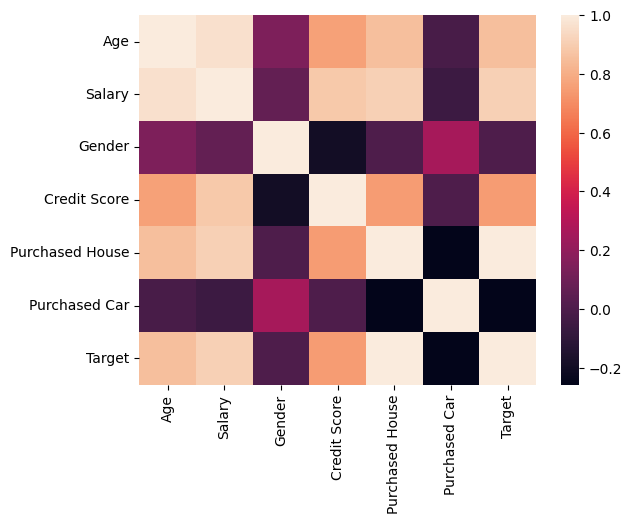

In [172]:
sns.heatmap(df.corr())

In [173]:
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))

In [185]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
df_reduced = df.drop(columns=to_drop)

In [186]:
print("Original features:", df.shape[1])
print("Features after dropping correlated ones:", df_reduced.shape[1])

Original features: 7
Features after dropping correlated ones: 4


In [188]:
print(df.columns)
print("-"*20)
print(df_reduced.columns)

Index(['Age', 'Salary', 'Gender', 'Credit Score', 'Purchased House',
       'Purchased Car', 'Target'],
      dtype='object')
--------------------
Index(['Age', 'Gender', 'Credit Score', 'Purchased Car'], dtype='object')


#### Selecting Important Features (Wrapper & Embedded Methods) :-

- Recursive Feature Elimination (RFE) using Random Forest

In [96]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

In [189]:
X, y = make_classification(n_samples=100, n_features=10, random_state=42)

In [190]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9
0,-1.140526,1.359706,0.861991,0.846092,0.606010,-1.556629,1.754794,1.696456,-1.280429,-2.081929
1,-0.078734,-1.329332,0.627375,-1.193006,-0.773010,0.097676,0.497998,0.959271,0.024510,1.451144
2,0.807427,0.730198,-1.285680,0.889484,-1.804882,-0.763259,0.048085,-0.904317,-1.627542,0.259723
3,0.588465,-0.375121,-0.575002,-0.149518,-0.563725,0.412931,0.243687,-0.506943,-0.822220,0.244967
4,1.636312,-1.640607,-1.360456,-0.941163,-1.430141,1.632411,0.130741,-1.435862,-0.440044,1.441273
...,...,...,...,...,...,...,...,...,...,...
95,0.531047,0.948005,-1.032233,0.996309,-1.008086,-2.038125,-0.351513,1.676437,-1.870792,0.018418
96,-0.963142,0.556003,0.964233,0.193754,-0.703176,1.149273,1.770801,1.812449,-0.034988,-0.626967
97,0.950573,-2.255540,-0.270624,-1.692005,0.504047,-0.985726,-0.792873,-1.035242,-0.530258,-0.107030
98,-1.016951,0.554484,1.031102,0.175930,0.615936,-1.081063,-0.309546,-1.251114,0.593101,0.326133


In [191]:
model = RandomForestClassifier()

In [192]:
rfe = RFE(model, n_features_to_select=5)  # Select 5 best features
rfe.fit(X, y)

RFE(estimator=RandomForestClassifier(), n_features_to_select=5)

In [193]:
print("Selected Features:", rfe.support_)  # True for selected features
print("Feature Ranking:", rfe.ranking_)  # 1 for most important features

Selected Features: [ True  True  True  True False False False False False  True]
Feature Ranking: [1 1 1 1 3 6 2 4 5 1]


- Lasso (L1 Regularization) for Feature Selection

In [194]:
from sklearn.linear_model import Lasso
from sklearn.datasets import make_regression

In [195]:
X, y = make_regression(n_samples=100, n_features=10, noise=0.1, random_state=42)

In [197]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9
0,-0.926930,-1.430141,1.632411,-3.241267,-1.247783,-1.024388,0.130741,-0.059525,-0.252568,-0.440044
1,0.202923,0.334457,0.285865,1.547505,-0.387702,1.795878,2.010205,-1.515744,-0.612789,0.658544
2,-0.241236,0.456753,0.342725,-1.251539,1.117296,1.443765,0.447709,0.352055,-0.082151,0.569767
3,0.289775,-1.008086,-2.038125,0.871125,-0.408075,-0.326024,-0.351513,2.075401,1.201214,-1.870792
4,-0.007973,-0.190339,-1.037246,0.077368,0.538910,-0.861284,-1.382800,1.479944,1.523124,-0.875618
...,...,...,...,...,...,...,...,...,...,...
95,0.113517,0.588317,-0.151785,1.586017,-1.952088,-1.237815,-0.622700,0.662131,2.133033,0.280992
96,0.208383,0.640843,1.797687,-0.247177,-0.281100,-0.681984,0.572583,-2.041735,-1.001620,-0.571179
97,0.496714,0.767435,1.579213,0.647689,-0.234137,1.523030,0.542560,-0.138264,-0.234153,-0.469474
98,-0.049464,2.455300,0.289169,-1.122722,0.492451,0.382410,-0.530997,0.674819,0.166452,-0.637740


In [198]:
lasso = Lasso(alpha=0.1)  # L1 regularization strength
lasso.fit(X, y)

Lasso(alpha=0.1)

In [199]:
print("Lasso Coefficients:", lasso.coef_)

Lasso Coefficients: [16.65093139 54.05831546  5.0204748  63.57011144 93.46899114 70.59900118
 86.94713107 10.25033395  3.09221178 70.77327962]


In [200]:
selected_features = [i for i, coef in enumerate(lasso.coef_) if coef != 0]
print("Selected Features:", selected_features)

Selected Features: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


- Tree-Based Feature Importance (Random Forest)

In [201]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [202]:
X, y = make_classification(n_samples=100, n_features=10, random_state=42)

In [203]:
model = RandomForestClassifier()
model.fit(X, y)

RandomForestClassifier()

In [204]:
# Get feature importances
importances = model.feature_importances_

# Select features with importance greater than a threshold
threshold = 0.1
important_features = [i for i, imp in enumerate(importances) if imp > threshold]

print("Feature Importances:", importances)
print("Selected Features:", important_features)

Feature Importances: [0.26702013 0.04124313 0.50305699 0.09020757 0.01351422 0.01118422
 0.02310887 0.0152908  0.010116   0.02525806]
Selected Features: [0, 2]


#### Dimensionality Reduction Techniques :-

- Principal Component Analysis (PCA)

In [205]:
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification

In [206]:
X, y = make_classification(n_samples=100, n_features=20, random_state=42)

In [207]:
pca = PCA(n_components=5)  # Reduce to 5 components
X_reduced = pca.fit_transform(X)

In [208]:
print("Original shape:", X.shape)
print("Shape after PCA:", X_reduced.shape)

Original shape: (100, 20)
Shape after PCA: (100, 5)


-  Linear Discriminant Analysis (LDA)

In [209]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import make_classification

In [210]:
X, y = make_classification(n_samples=100, n_features=10, random_state=42)

In [ ]:
x = df.drop(columns="")

In [211]:
lda = LinearDiscriminantAnalysis(n_components=1)  # Reduce to 2 components
X_reduced = lda.fit_transform(X, y)

In [212]:
print("Original shape:", X.shape)
print("Shape after LDA:", X_reduced.shape)

Original shape: (100, 10)
Shape after LDA: (100, 1)


#### Univariate Feature Selection (SelectKBest) :-

- SelectKBest with ANOVA F-Score

In [149]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.datasets import make_classification

In [150]:
X, y = make_classification(n_samples=100, n_features=10, random_state=42)

In [151]:
k_best = SelectKBest(score_func=f_classif, k=5)  # Select 5 best features
X_selected = k_best.fit_transform(X, y)

In [214]:
print("Original shape:", X.shape[1])
print("Shape after SelectKBest:", X_selected.shape[1])

Original shape: 10
Shape after SelectKBest: 5


#### Using Boruta for All-Relevant Feature Selection :-

In [158]:
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
from sklearn.datasets import make_classification

In [159]:
X, y = make_classification(n_samples=100, n_features=10, random_state=42)

In [160]:
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)

In [161]:
# Apply Boruta feature selection
boruta = BorutaPy(estimator=rf, n_estimators='auto', random_state=42)
boruta.fit(X, y)

BorutaPy(estimator=RandomForestClassifier(class_weight='balanced', max_depth=5,
                                          n_estimators=63, n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x28797226440),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x28797226440)

In [163]:
selected_features = boruta.support_
print("Selected Features (True/False):", selected_features)

Selected Features (True/False): [ True  True  True  True False False False False False False]
